In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import phik 
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor
import optuna


pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
pd.set_option('display.max_columns', None)


In [7]:
df = pd.read_excel('mold_cost.xlsx')
df


,Name,mold_len,mold_wid,mold_hi,power,S,ToolArt_ST_630,ToolArt_SM_625,Смола эпоксидная,Отвердитель эпоксидной смолы,Рым-гайка,Катализатор Юнисил,Силикон Юнисил 9131,Стеклохолст,АД31Т1 100х20х3,VGV,mold_cost,calculated_mold
0,Дс-514,430,270,70,2,0.066500,2.0,NaN,3.0,1.50,NaN,0.030,0.30,0.2,NaN,1.0,4851.50,8037.597955
1,Дкл-42,410,240,280,1,0.052800,NaN,4.50,4.0,2.00,NaN,0.020,0.50,0.1,NaN,1.0,8648.50,10067.169947
2,Ду-198,505,510,105,2,0.182750,NaN,4.10,3.0,1.50,NaN,NaN,0.50,1.0,NaN,2.0,7544.00,12748.087099
3,Ду-199,540,380,105,2,0.138000,NaN,3.70,3.0,1.50,NaN,0.020,0.40,0.8,NaN,2.0,6956.00,11265.015656
4,Дк-225,1090,355,245,1,0.277750,8.1,NaN,4.2,2.40,6.0,0.150,1.50,1.0,3.27,3.0,19600.95,20255.332504
5,Дк-484,1140,285,115,1,0.217300,NaN,9.70,6.0,3.00,NaN,0.150,1.50,1.0,NaN,3.0,17663.50,15255.367711
6,Дк-211,440,510,370,1,0.154800,8.5,NaN,5.0,2.50,6.0,0.040,1.00,0.6,NaN,8.0,17557.00,17166.237867
7,Дс-516,275,190,90,2,0.021450,2.2,NaN,1.0,0.50,NaN,0.015,0.50,0.1,NaN,4.0,4191.00,5729.895777
8,Дс-513,440,270,100,2,0.068400,3.3,NaN,1.2,0.60,NaN,0.015,0.50,0.1,NaN,4.0,5846.00,8475.825911
9,Параллель-4,1110,600,95,1,0.535600,15.0,NaN,7.7,3.80,NaN,0.450,1.50,0.6,NaN,10.0,27469.00,22940.764169


In [ ]:

phik_corr = df.phik_matrix()

interval columns not set, guessing: ['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


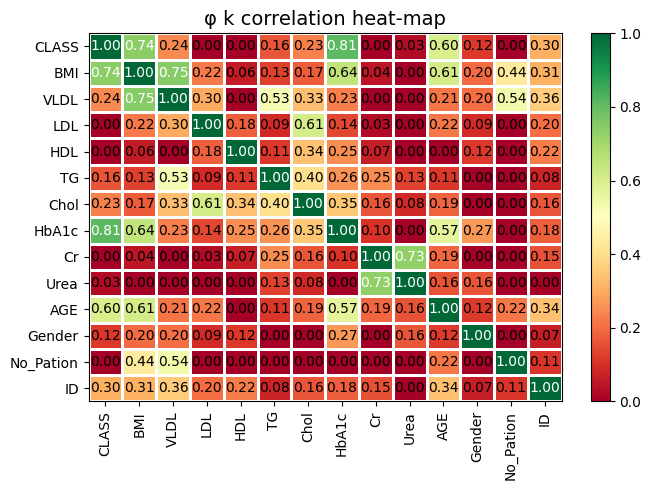

In [ ]:
from phik.report import plot_correlation_matrix
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    vmin=0, vmax=1,  # optional; defaults are (-1, +1)
    title="φ k correlation heat-map"
)
plt.show()

In [ ]:
df.drop(columns=['No_Pation'])

,ID,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [ ]:
# sns.histplot(df['BMI'])


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',
       'LDL', 'VLDL', 'BMI'],
      dtype='object')

In [ ]:
df['CLASS'].unique()


array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [ ]:
df['CLASS'] = df['CLASS'].apply(lambda x: x.strip())

In [ ]:
# for col in num_cols:
#     sns.histplot(df[col])
#     plt.show()


In [ ]:
# for col in num_cols:
#     sns.histplot(x=df[col],hue=df['CLASS'])
#     plt.show()

In [ ]:
# df.columns
# for col in num_cols:
#     sns.boxplot(x=df[col],hue=df['CLASS'])
#     plt.show()


In [ ]:
# df[df['Cr'] > 500]

In [ ]:
pt = PowerTransformer()
pt.fit(df[num_cols])
df[num_cols] = pt.transform(df[num_cols])
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.754289,-0.429866,F,-0.515273,0.088463,-0.645093,-1.369842,-0.477140,-1.542795,1.972207,-1.189413,-1.245266,-1.132484,N
1,1.395356,0.058093,M,-2.444896,-0.018327,0.125028,-1.369842,-0.889512,-0.719101,0.045518,-0.364022,-0.911140,-1.350261,N
2,0.492238,0.312948,F,-0.515273,0.088463,-0.645093,-1.369842,-0.477140,-1.542795,1.972207,-1.189413,-1.245266,-1.132484,N
3,1.254933,0.765615,F,-0.515273,0.088463,-0.645093,-1.369842,-0.477140,-1.542795,1.972207,-1.189413,-1.245266,-1.132484,N
4,0.760390,0.058137,M,-2.031287,1.041333,-0.645093,-1.369842,0.073971,-1.352969,-0.975493,-0.470894,-1.639884,-1.795883,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.386831,1.988252,M,2.440784,1.922709,1.134743,-0.472868,1.920161,-0.341460,0.305668,-0.694677,-0.911140,0.114016,Y
996,1.231397,2.471286,M,-2.161476,-1.061812,0.044398,1.532921,-0.558275,0.162797,-1.425692,-0.061158,2.292180,1.500065,Y
997,1.226145,0.765598,M,-2.222929,1.041333,0.747814,-0.596396,-0.558275,-1.177204,0.305668,-0.061158,2.147631,-0.414386,Y
998,-0.975684,-0.210294,M,-1.662534,0.588336,0.002699,-0.596396,0.376918,-0.023344,1.090264,0.393614,2.277560,2.103404,Y


In [ ]:
# for col in num_cols:
#     sns.histplot(x=df[col],hue=df['CLASS'])
#     plt.show()

In [ ]:
# df.columns
# for col in num_cols:
#     sns.boxplot(x=df[col],hue=df['CLASS'])
#     plt.show()

In [ ]:
phik_corr = df.phik_matrix()

interval columns not set, guessing: ['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


In [ ]:
sign = np.sign(df[num_cols].corr(method='spearman'))
sign

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0
No_Pation,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
AGE,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Urea,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
Cr,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
HbA1c,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
Chol,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TG,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
HDL,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
LDL,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0


In [ ]:
phik_corr.loc[num_cols,num_cols] = phik_corr.loc[num_cols,num_cols] * sign

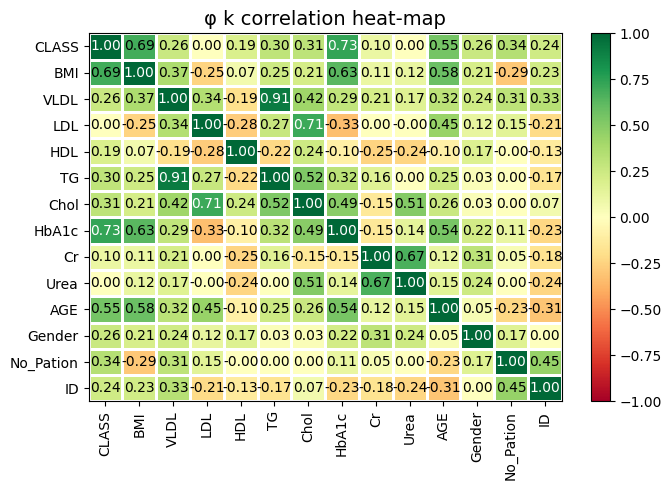

In [ ]:
from phik.report import plot_correlation_matrix
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    vmin=-1, vmax=1,  # optional; defaults are (-1, +1)
    title="φ k correlation heat-map"
)
plt.show()

In [ ]:
X = df.drop(columns='CLASS')
y = df['CLASS']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



In [ ]:
ohe_cols = ['CLASS']
ohe_cols2= ['Gender']
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [ ]:

ohe_pipe2 = Pipeline([
    ('ohe2',OneHotEncoder(sparse_output=False))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_xgb = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBClassifier())
])


# model = Pipeline([
#     ('transform', transform),
#     ('model', RandomForestClassifier())
#     # ('model', DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=18, ccp_alpha=0.00002))
# ])


In [ ]:
ohe_pipe2 = Pipeline([
    ('ohe2',OneHotEncoder(sparse_output=False))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMClassifier())
])

In [ ]:
# ohe_pipe2 = Pipeline([
#     ('ohe2',OneHotEncoder(sparse_output=False))
# ])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    # ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
],remainder='passthrough')
model_cbc = Pipeline([
    ('transform', transform),
    ('model', CatBoostClassifier(cat_features=['remainder__'+col for col in ohe_cols2]), n_estimators = 1000)
])

In [ ]:
def objective(trial):
    params = {
        'model__n_estimators': trial.suggest_int('model__n_estimators', 100, 1000),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 10),
        'model__learning_rate': trial.suggest_float('model__learning_rate', 0.01, 0.1),
    }
    transform = ColumnTransformer([
        ('num_cols', num_pipe, num_cols)
    ],remainder='passthrough')

    model_cbc = Pipeline([
        ('transform', transform),
        ('model', CatBoostClassifier(cat_features=['remainder__'+col for col in ohe_cols2], n_estimators = 1000))
    ])
    model_cbc.set_params(**params)
    model_cbc.fit(X_train, y_train)
    pred_cbc = model_cbc.predict(X_test)
    fc_cbc = f1_score(y_test,pred_cbc,average="weighted")
    return fc_cbc
study_cbc = optuna.create_study(direction='minimize')
study_cbc.optimize(objective, n_trials=20)



[I 2025-09-22 22:59:02,663] A new study created in memory with name: no-name-d7fa8c63-de71-48ea-87b7-2f4b65c7bdfb


0:	learn: 0.9627227	total: 40.4ms	remaining: 38.9s
1:	learn: 0.8582825	total: 67.8ms	remaining: 32.6s
2:	learn: 0.7720927	total: 110ms	remaining: 35.2s
3:	learn: 0.6980225	total: 121ms	remaining: 29.1s
4:	learn: 0.6304067	total: 134ms	remaining: 25.6s
5:	learn: 0.5775677	total: 176ms	remaining: 28.1s
6:	learn: 0.5256816	total: 196ms	remaining: 26.7s
7:	learn: 0.4877588	total: 241ms	remaining: 28.8s
8:	learn: 0.4650813	total: 282ms	remaining: 29.9s
9:	learn: 0.4298827	total: 323ms	remaining: 30.7s
10:	learn: 0.4105962	total: 366ms	remaining: 31.7s
11:	learn: 0.3761952	total: 384ms	remaining: 30.5s
12:	learn: 0.3528775	total: 428ms	remaining: 31.2s
13:	learn: 0.3277304	total: 469ms	remaining: 31.8s
14:	learn: 0.3050804	total: 513ms	remaining: 32.4s
15:	learn: 0.2924213	total: 516ms	remaining: 30.6s
16:	learn: 0.2738043	total: 533ms	remaining: 29.7s
17:	learn: 0.2539712	total: 560ms	remaining: 29.4s
18:	learn: 0.2369327	total: 581ms	remaining: 28.9s
19:	learn: 0.2222073	total: 619ms	remai

[I 2025-09-22 22:59:39,952] Trial 0 finished with value: 0.9848386870035847 and parameters: {'model__n_estimators': 963, 'model__max_depth': 9, 'model__learning_rate': 0.09733621326888318}. Best is trial 0 with value: 0.9848386870035847.


961:	learn: 0.0019222	total: 36.9s	remaining: 38.4ms
962:	learn: 0.0019200	total: 36.9s	remaining: 0us
0:	learn: 0.9804804	total: 18.6ms	remaining: 7.5s
1:	learn: 0.8744401	total: 38.5ms	remaining: 7.76s
2:	learn: 0.7909243	total: 56.3ms	remaining: 7.55s
3:	learn: 0.7197480	total: 71.8ms	remaining: 7.19s
4:	learn: 0.6577809	total: 89.2ms	remaining: 7.13s
5:	learn: 0.5972235	total: 107ms	remaining: 7.11s
6:	learn: 0.5486587	total: 129ms	remaining: 7.33s
7:	learn: 0.5119442	total: 146ms	remaining: 7.26s
8:	learn: 0.4726049	total: 167ms	remaining: 7.36s
9:	learn: 0.4406728	total: 188ms	remaining: 7.43s
10:	learn: 0.4087947	total: 225ms	remaining: 8.04s
11:	learn: 0.3818806	total: 244ms	remaining: 7.98s
12:	learn: 0.3559918	total: 261ms	remaining: 7.87s
13:	learn: 0.3347950	total: 282ms	remaining: 7.88s
14:	learn: 0.3138997	total: 299ms	remaining: 7.78s
15:	learn: 0.2936975	total: 316ms	remaining: 7.68s
16:	learn: 0.2771427	total: 333ms	remaining: 7.61s
17:	learn: 0.2587975	total: 354ms	re

[I 2025-09-22 22:59:47,814] Trial 1 finished with value: 0.99 and parameters: {'model__n_estimators': 405, 'model__max_depth': 6, 'model__learning_rate': 0.0883145043917838}. Best is trial 0 with value: 0.9848386870035847.


404:	learn: 0.0045093	total: 7.73s	remaining: 0us
0:	learn: 1.0627502	total: 22.7ms	remaining: 15.7s
1:	learn: 1.0256066	total: 38ms	remaining: 13.1s
2:	learn: 0.9934032	total: 54.7ms	remaining: 12.5s
3:	learn: 0.9645200	total: 75.9ms	remaining: 13s
4:	learn: 0.9341304	total: 97.4ms	remaining: 13.4s
5:	learn: 0.9030887	total: 116ms	remaining: 13.3s
6:	learn: 0.8775217	total: 134ms	remaining: 13.1s
7:	learn: 0.8536787	total: 154ms	remaining: 13.2s
8:	learn: 0.8287620	total: 172ms	remaining: 13s
9:	learn: 0.8059971	total: 192ms	remaining: 13.1s
10:	learn: 0.7829241	total: 210ms	remaining: 13s
11:	learn: 0.7612722	total: 228ms	remaining: 12.9s
12:	learn: 0.7402886	total: 248ms	remaining: 12.9s
13:	learn: 0.7210338	total: 265ms	remaining: 12.8s
14:	learn: 0.7021887	total: 282ms	remaining: 12.7s
15:	learn: 0.6825544	total: 302ms	remaining: 12.7s
16:	learn: 0.6647609	total: 325ms	remaining: 12.9s
17:	learn: 0.6466889	total: 343ms	remaining: 12.8s
18:	learn: 0.6317432	total: 359ms	remaining: 

[I 2025-09-22 23:00:03,056] Trial 2 finished with value: 0.99 and parameters: {'model__n_estimators': 691, 'model__max_depth': 6, 'model__learning_rate': 0.026044586982431152}. Best is trial 0 with value: 0.9848386870035847.


0:	learn: 0.9915224	total: 13.5ms	remaining: 3.15s
1:	learn: 0.9043662	total: 22.6ms	remaining: 2.62s
2:	learn: 0.8161073	total: 37.7ms	remaining: 2.9s
3:	learn: 0.7498774	total: 57ms	remaining: 3.27s
4:	learn: 0.6939432	total: 74.9ms	remaining: 3.43s
5:	learn: 0.6402601	total: 88ms	remaining: 3.34s
6:	learn: 0.5877777	total: 104ms	remaining: 3.36s
7:	learn: 0.5468997	total: 117ms	remaining: 3.32s
8:	learn: 0.5122007	total: 129ms	remaining: 3.22s
9:	learn: 0.4818331	total: 142ms	remaining: 3.18s
10:	learn: 0.4525336	total: 158ms	remaining: 3.21s
11:	learn: 0.4230404	total: 171ms	remaining: 3.16s
12:	learn: 0.3970966	total: 186ms	remaining: 3.16s
13:	learn: 0.3742318	total: 202ms	remaining: 3.17s
14:	learn: 0.3511064	total: 215ms	remaining: 3.13s
15:	learn: 0.3332100	total: 227ms	remaining: 3.09s
16:	learn: 0.3145581	total: 241ms	remaining: 3.08s
17:	learn: 0.2990238	total: 258ms	remaining: 3.09s
18:	learn: 0.2824794	total: 275ms	remaining: 3.11s
19:	learn: 0.2670879	total: 289ms	remain

[I 2025-09-22 23:00:06,624] Trial 3 finished with value: 0.9950508931580722 and parameters: {'model__n_estimators': 234, 'model__max_depth': 4, 'model__learning_rate': 0.0781788124499686}. Best is trial 0 with value: 0.9848386870035847.


231:	learn: 0.0155017	total: 3.44s	remaining: 29.6ms
232:	learn: 0.0154449	total: 3.45s	remaining: 14.8ms
233:	learn: 0.0153667	total: 3.47s	remaining: 0us
0:	learn: 0.9779047	total: 13.3ms	remaining: 8.21s
1:	learn: 0.8823259	total: 28.1ms	remaining: 8.61s
2:	learn: 0.7868717	total: 43.6ms	remaining: 8.9s
3:	learn: 0.7167134	total: 57.1ms	remaining: 8.74s
4:	learn: 0.6583193	total: 75.6ms	remaining: 9.23s
5:	learn: 0.6017568	total: 91.2ms	remaining: 9.27s
6:	learn: 0.5469003	total: 108ms	remaining: 9.38s
7:	learn: 0.5055309	total: 123ms	remaining: 9.33s
8:	learn: 0.4707062	total: 134ms	remaining: 9.04s
9:	learn: 0.4407074	total: 146ms	remaining: 8.83s
10:	learn: 0.4118395	total: 156ms	remaining: 8.6s
11:	learn: 0.3829603	total: 173ms	remaining: 8.73s
12:	learn: 0.3553459	total: 190ms	remaining: 8.81s
13:	learn: 0.3342490	total: 204ms	remaining: 8.78s
14:	learn: 0.3122162	total: 218ms	remaining: 8.72s
15:	learn: 0.2982557	total: 233ms	remaining: 8.74s
16:	learn: 0.2803660	total: 247ms	

[I 2025-09-22 23:00:16,037] Trial 4 finished with value: 0.9950508931580722 and parameters: {'model__n_estimators': 616, 'model__max_depth': 4, 'model__learning_rate': 0.08859421966951955}. Best is trial 0 with value: 0.9848386870035847.


614:	learn: 0.0043210	total: 9.21s	remaining: 15ms
615:	learn: 0.0043157	total: 9.22s	remaining: 0us
0:	learn: 1.0350937	total: 16.2ms	remaining: 13.7s
1:	learn: 0.9782630	total: 29.7ms	remaining: 12.6s
2:	learn: 0.9313485	total: 42.8ms	remaining: 12.1s
3:	learn: 0.8859162	total: 57ms	remaining: 12s
4:	learn: 0.8473523	total: 78.2ms	remaining: 13.2s
5:	learn: 0.8068323	total: 98.4ms	remaining: 13.8s
6:	learn: 0.7655599	total: 113ms	remaining: 13.6s
7:	learn: 0.7303511	total: 132ms	remaining: 13.8s
8:	learn: 0.6996911	total: 147ms	remaining: 13.7s
9:	learn: 0.6665976	total: 166ms	remaining: 13.9s
10:	learn: 0.6371427	total: 184ms	remaining: 14s
11:	learn: 0.6115844	total: 203ms	remaining: 14.2s
12:	learn: 0.5859293	total: 224ms	remaining: 14.4s
13:	learn: 0.5619369	total: 243ms	remaining: 14.5s
14:	learn: 0.5370880	total: 266ms	remaining: 14.8s
15:	learn: 0.5138452	total: 283ms	remaining: 14.7s
16:	learn: 0.4928476	total: 302ms	remaining: 14.8s
17:	learn: 0.4721863	total: 323ms	remainin

[I 2025-09-22 23:00:31,435] Trial 5 finished with value: 0.9950508931580722 and parameters: {'model__n_estimators': 849, 'model__max_depth': 5, 'model__learning_rate': 0.044757978468095296}. Best is trial 0 with value: 0.9848386870035847.


846:	learn: 0.0053224	total: 15.1s	remaining: 35.7ms
847:	learn: 0.0052978	total: 15.1s	remaining: 17.9ms
848:	learn: 0.0052926	total: 15.2s	remaining: 0us
0:	learn: 1.0656798	total: 31.2ms	remaining: 26.1s
1:	learn: 1.0345210	total: 57.5ms	remaining: 24s
2:	learn: 1.0055390	total: 81.2ms	remaining: 22.6s
3:	learn: 0.9745436	total: 107ms	remaining: 22.3s
4:	learn: 0.9493775	total: 122ms	remaining: 20.4s
5:	learn: 0.9255524	total: 149ms	remaining: 20.6s
6:	learn: 0.9033701	total: 180ms	remaining: 21.4s
7:	learn: 0.8782386	total: 191ms	remaining: 19.8s
8:	learn: 0.8568594	total: 212ms	remaining: 19.5s
9:	learn: 0.8355077	total: 232ms	remaining: 19.2s
10:	learn: 0.8203352	total: 256ms	remaining: 19.2s
11:	learn: 0.7988277	total: 280ms	remaining: 19.2s
12:	learn: 0.7817599	total: 287ms	remaining: 18.2s
13:	learn: 0.7641090	total: 307ms	remaining: 18.1s
14:	learn: 0.7470506	total: 339ms	remaining: 18.6s
15:	learn: 0.7302685	total: 366ms	remaining: 18.8s
16:	learn: 0.7142172	total: 376ms	rem

[I 2025-09-22 23:00:52,540] Trial 6 finished with value: 0.99 and parameters: {'model__n_estimators': 838, 'model__max_depth': 8, 'model__learning_rate': 0.022993965703711476}. Best is trial 0 with value: 0.9848386870035847.


0:	learn: 1.0379046	total: 9.74ms	remaining: 3.29s
1:	learn: 0.9837695	total: 20.2ms	remaining: 3.4s
2:	learn: 0.9324591	total: 29.7ms	remaining: 3.33s
3:	learn: 0.8847821	total: 40.4ms	remaining: 3.39s
4:	learn: 0.8429459	total: 49.4ms	remaining: 3.3s
5:	learn: 0.8014508	total: 57.8ms	remaining: 3.21s
6:	learn: 0.7593412	total: 70.3ms	remaining: 3.33s
7:	learn: 0.7282521	total: 79.8ms	remaining: 3.3s
8:	learn: 0.6936812	total: 89.8ms	remaining: 3.29s
9:	learn: 0.6654405	total: 98.5ms	remaining: 3.24s
10:	learn: 0.6375302	total: 107ms	remaining: 3.18s
11:	learn: 0.6093422	total: 117ms	remaining: 3.18s
12:	learn: 0.5837357	total: 126ms	remaining: 3.17s
13:	learn: 0.5606594	total: 135ms	remaining: 3.12s
14:	learn: 0.5366962	total: 143ms	remaining: 3.08s
15:	learn: 0.5168325	total: 152ms	remaining: 3.07s
16:	learn: 0.4982228	total: 164ms	remaining: 3.11s
17:	learn: 0.4804444	total: 173ms	remaining: 3.08s
18:	learn: 0.4649133	total: 185ms	remaining: 3.12s
19:	learn: 0.4456782	total: 194ms	

[I 2025-09-22 23:00:56,491] Trial 7 finished with value: 0.9950508931580722 and parameters: {'model__n_estimators': 339, 'model__max_depth': 4, 'model__learning_rate': 0.04355225537001415}. Best is trial 0 with value: 0.9848386870035847.


331:	learn: 0.0202167	total: 3.74s	remaining: 78.8ms
332:	learn: 0.0201706	total: 3.75s	remaining: 67.6ms
333:	learn: 0.0201181	total: 3.76s	remaining: 56.3ms
334:	learn: 0.0200409	total: 3.77s	remaining: 45ms
335:	learn: 0.0199560	total: 3.78s	remaining: 33.8ms
336:	learn: 0.0198734	total: 3.79s	remaining: 22.5ms
337:	learn: 0.0198190	total: 3.81s	remaining: 11.3ms
338:	learn: 0.0197476	total: 3.81s	remaining: 0us
0:	learn: 1.0044083	total: 27ms	remaining: 8s
1:	learn: 0.9237409	total: 52.8ms	remaining: 7.79s
2:	learn: 0.8552535	total: 79.9ms	remaining: 7.83s
3:	learn: 0.7873447	total: 109ms	remaining: 7.96s
4:	learn: 0.7444838	total: 136ms	remaining: 7.95s
5:	learn: 0.6938389	total: 159ms	remaining: 7.71s
6:	learn: 0.6465229	total: 172ms	remaining: 7.15s
7:	learn: 0.6080193	total: 177ms	remaining: 6.41s
8:	learn: 0.5726494	total: 205ms	remaining: 6.57s
9:	learn: 0.5346958	total: 232ms	remaining: 6.67s
10:	learn: 0.5037992	total: 255ms	remaining: 6.62s
11:	learn: 0.4729371	total: 276m

[I 2025-09-22 23:01:04,816] Trial 8 finished with value: 0.99 and parameters: {'model__n_estimators': 297, 'model__max_depth': 8, 'model__learning_rate': 0.0670781746969674}. Best is trial 0 with value: 0.9848386870035847.


291:	learn: 0.0094466	total: 8.04s	remaining: 138ms
292:	learn: 0.0093681	total: 8.07s	remaining: 110ms
293:	learn: 0.0093315	total: 8.1s	remaining: 82.7ms
294:	learn: 0.0092871	total: 8.13s	remaining: 55.1ms
295:	learn: 0.0092552	total: 8.16s	remaining: 27.6ms
296:	learn: 0.0092232	total: 8.19s	remaining: 0us
0:	learn: 0.9724009	total: 26.6ms	remaining: 18.8s
1:	learn: 0.8699846	total: 52.7ms	remaining: 18.5s
2:	learn: 0.7868453	total: 78.8ms	remaining: 18.5s
3:	learn: 0.7111648	total: 112ms	remaining: 19.7s
4:	learn: 0.6628325	total: 142ms	remaining: 20s
5:	learn: 0.6013656	total: 163ms	remaining: 19s
6:	learn: 0.5505663	total: 176ms	remaining: 17.6s
7:	learn: 0.5107944	total: 182ms	remaining: 15.8s
8:	learn: 0.4746096	total: 209ms	remaining: 16.2s
9:	learn: 0.4352887	total: 236ms	remaining: 16.5s
10:	learn: 0.4032101	total: 265ms	remaining: 16.7s
11:	learn: 0.3786481	total: 271ms	remaining: 15.6s
12:	learn: 0.3539652	total: 297ms	remaining: 15.8s
13:	learn: 0.3317706	total: 308ms	re

[I 2025-09-22 23:01:24,662] Trial 9 finished with value: 0.9848386870035847 and parameters: {'model__n_estimators': 706, 'model__max_depth': 8, 'model__learning_rate': 0.09085580024594299}. Best is trial 0 with value: 0.9848386870035847.


0:	learn: 1.0171159	total: 50.6ms	remaining: 50.6s
1:	learn: 0.9449831	total: 102ms	remaining: 50.8s
2:	learn: 0.8882369	total: 152ms	remaining: 50.5s
3:	learn: 0.8371829	total: 186ms	remaining: 46.3s
4:	learn: 0.7925838	total: 236ms	remaining: 47s
5:	learn: 0.7412563	total: 264ms	remaining: 43.8s
6:	learn: 0.6967847	total: 283ms	remaining: 40.1s
7:	learn: 0.6599105	total: 333ms	remaining: 41.3s
8:	learn: 0.6225473	total: 359ms	remaining: 39.5s
9:	learn: 0.5855170	total: 376ms	remaining: 37.2s
10:	learn: 0.5554173	total: 425ms	remaining: 38.2s
11:	learn: 0.5287508	total: 459ms	remaining: 37.8s
12:	learn: 0.5014889	total: 494ms	remaining: 37.5s
13:	learn: 0.4771700	total: 511ms	remaining: 36s
14:	learn: 0.4594201	total: 560ms	remaining: 36.8s
15:	learn: 0.4403551	total: 613ms	remaining: 37.7s
16:	learn: 0.4162601	total: 639ms	remaining: 36.9s
17:	learn: 0.3989121	total: 688ms	remaining: 37.5s
18:	learn: 0.3819715	total: 738ms	remaining: 38.1s
19:	learn: 0.3709623	total: 790ms	remaining:

[I 2025-09-22 23:02:14,659] Trial 10 finished with value: 0.99 and parameters: {'model__n_estimators': 1000, 'model__max_depth': 10, 'model__learning_rate': 0.06142299775166747}. Best is trial 0 with value: 0.9848386870035847.


998:	learn: 0.0039947	total: 49.6s	remaining: 49.6ms
999:	learn: 0.0039918	total: 49.6s	remaining: 0us
0:	learn: 0.9697221	total: 49.2ms	remaining: 48.1s
1:	learn: 0.8646828	total: 98.2ms	remaining: 48s
2:	learn: 0.7867295	total: 147ms	remaining: 47.9s
3:	learn: 0.7201381	total: 181ms	remaining: 44.2s
4:	learn: 0.6648032	total: 230ms	remaining: 44.8s
5:	learn: 0.6042604	total: 255ms	remaining: 41.3s
6:	learn: 0.5546750	total: 314ms	remaining: 43.7s
7:	learn: 0.5108228	total: 323ms	remaining: 39.2s
8:	learn: 0.4671510	total: 349ms	remaining: 37.6s
9:	learn: 0.4316710	total: 374ms	remaining: 36.3s
10:	learn: 0.4000974	total: 423ms	remaining: 37.3s
11:	learn: 0.3657876	total: 459ms	remaining: 37s
12:	learn: 0.3398269	total: 476ms	remaining: 35.4s
13:	learn: 0.3165210	total: 489ms	remaining: 33.7s
14:	learn: 0.3000310	total: 537ms	remaining: 34.5s
15:	learn: 0.2825971	total: 587ms	remaining: 35.4s
16:	learn: 0.2684333	total: 638ms	remaining: 36.1s
17:	learn: 0.2504093	total: 686ms	remainin

[I 2025-09-22 23:03:02,966] Trial 11 finished with value: 0.99 and parameters: {'model__n_estimators': 980, 'model__max_depth': 10, 'model__learning_rate': 0.09870075726391195}. Best is trial 0 with value: 0.9848386870035847.


0:	learn: 0.9605269	total: 26.1ms	remaining: 19.9s
1:	learn: 0.8507220	total: 49.6ms	remaining: 18.9s
2:	learn: 0.7630137	total: 73.2ms	remaining: 18.6s
3:	learn: 0.6841801	total: 96.9ms	remaining: 18.4s
4:	learn: 0.6344986	total: 121ms	remaining: 18.4s
5:	learn: 0.5715700	total: 141ms	remaining: 17.8s
6:	learn: 0.5201832	total: 153ms	remaining: 16.5s
7:	learn: 0.4804460	total: 157ms	remaining: 14.9s
8:	learn: 0.4415413	total: 180ms	remaining: 15.1s
9:	learn: 0.4087311	total: 193ms	remaining: 14.5s
10:	learn: 0.3784909	total: 216ms	remaining: 14.8s
11:	learn: 0.3490843	total: 241ms	remaining: 15.1s
12:	learn: 0.3291743	total: 251ms	remaining: 14.5s
13:	learn: 0.3089716	total: 275ms	remaining: 14.7s
14:	learn: 0.2906459	total: 299ms	remaining: 14.9s
15:	learn: 0.2707529	total: 324ms	remaining: 15.1s
16:	learn: 0.2574724	total: 348ms	remaining: 15.3s
17:	learn: 0.2408286	total: 363ms	remaining: 15s
18:	learn: 0.2263206	total: 386ms	remaining: 15.1s
19:	learn: 0.2126659	total: 411ms	remai

[I 2025-09-22 23:03:21,862] Trial 12 finished with value: 0.99 and parameters: {'model__n_estimators': 764, 'model__max_depth': 8, 'model__learning_rate': 0.09981957206057218}. Best is trial 0 with value: 0.9848386870035847.


758:	learn: 0.0017579	total: 18.5s	remaining: 122ms
759:	learn: 0.0017552	total: 18.5s	remaining: 97.5ms
760:	learn: 0.0017531	total: 18.5s	remaining: 73.1ms
761:	learn: 0.0017506	total: 18.6s	remaining: 48.7ms
762:	learn: 0.0017471	total: 18.6s	remaining: 24.4ms
763:	learn: 0.0017450	total: 18.6s	remaining: 0us
0:	learn: 0.9906336	total: 33.9ms	remaining: 17.5s
1:	learn: 0.9034632	total: 51.3ms	remaining: 13.3s
2:	learn: 0.8289250	total: 87.4ms	remaining: 15s
3:	learn: 0.7623388	total: 96.2ms	remaining: 12.4s
4:	learn: 0.7071658	total: 101ms	remaining: 10.3s
5:	learn: 0.6611394	total: 132ms	remaining: 11.3s
6:	learn: 0.6118945	total: 167ms	remaining: 12.2s
7:	learn: 0.5669456	total: 199ms	remaining: 12.7s
8:	learn: 0.5333415	total: 232ms	remaining: 13.1s
9:	learn: 0.5092323	total: 235ms	remaining: 11.9s
10:	learn: 0.4823525	total: 268ms	remaining: 12.4s
11:	learn: 0.4487906	total: 283ms	remaining: 12s
12:	learn: 0.4270081	total: 315ms	remaining: 12.3s
13:	learn: 0.4048787	total: 347ms

[I 2025-09-22 23:03:39,282] Trial 13 finished with value: 0.9848386870035847 and parameters: {'model__n_estimators': 519, 'model__max_depth': 9, 'model__learning_rate': 0.07660784490096018}. Best is trial 0 with value: 0.9848386870035847.


516:	learn: 0.0052903	total: 17.1s	remaining: 66.3ms
517:	learn: 0.0052779	total: 17.2s	remaining: 33.2ms
518:	learn: 0.0052657	total: 17.2s	remaining: 0us
0:	learn: 0.9826439	total: 16.6ms	remaining: 2.29s
1:	learn: 0.8790058	total: 33.1ms	remaining: 2.27s
2:	learn: 0.8074624	total: 50.8ms	remaining: 2.3s
3:	learn: 0.7419475	total: 70.7ms	remaining: 2.39s
4:	learn: 0.6790947	total: 89.8ms	remaining: 2.41s
5:	learn: 0.6215210	total: 108ms	remaining: 2.38s
6:	learn: 0.5714864	total: 125ms	remaining: 2.36s
7:	learn: 0.5304191	total: 143ms	remaining: 2.35s
8:	learn: 0.4990942	total: 161ms	remaining: 2.33s
9:	learn: 0.4712622	total: 179ms	remaining: 2.31s
10:	learn: 0.4392457	total: 197ms	remaining: 2.29s
11:	learn: 0.4094870	total: 215ms	remaining: 2.27s
12:	learn: 0.3859451	total: 232ms	remaining: 2.25s
13:	learn: 0.3630289	total: 249ms	remaining: 2.22s
14:	learn: 0.3420500	total: 268ms	remaining: 2.21s
15:	learn: 0.3238636	total: 286ms	remaining: 2.2s
16:	learn: 0.3050077	total: 304ms	r

[I 2025-09-22 23:03:41,893] Trial 14 finished with value: 0.99 and parameters: {'model__n_estimators': 139, 'model__max_depth': 7, 'model__learning_rate': 0.08278064676992661}. Best is trial 0 with value: 0.9848386870035847.


129:	learn: 0.0214947	total: 2.36s	remaining: 163ms
130:	learn: 0.0212537	total: 2.38s	remaining: 145ms
131:	learn: 0.0209435	total: 2.4s	remaining: 127ms
132:	learn: 0.0206248	total: 2.42s	remaining: 109ms
133:	learn: 0.0203678	total: 2.43s	remaining: 90.8ms
134:	learn: 0.0200271	total: 2.45s	remaining: 72.6ms
135:	learn: 0.0197903	total: 2.47s	remaining: 54.5ms
136:	learn: 0.0196302	total: 2.49s	remaining: 36.3ms
137:	learn: 0.0193863	total: 2.5s	remaining: 18.2ms
138:	learn: 0.0191558	total: 2.52s	remaining: 0us
0:	learn: 1.0051990	total: 32.1ms	remaining: 17.5s
1:	learn: 0.9278557	total: 52.2ms	remaining: 14.2s
2:	learn: 0.8604408	total: 88.4ms	remaining: 16s
3:	learn: 0.7989221	total: 95.8ms	remaining: 13s
4:	learn: 0.7470408	total: 101ms	remaining: 10.9s
5:	learn: 0.7035766	total: 132ms	remaining: 11.9s
6:	learn: 0.6566387	total: 165ms	remaining: 12.7s
7:	learn: 0.6141397	total: 197ms	remaining: 13.2s
8:	learn: 0.5813309	total: 230ms	remaining: 13.7s
9:	learn: 0.5572516	total: 23

[I 2025-09-22 23:03:59,821] Trial 15 finished with value: 0.9848386870035847 and parameters: {'model__n_estimators': 545, 'model__max_depth': 9, 'model__learning_rate': 0.06595375621047275}. Best is trial 0 with value: 0.9848386870035847.


540:	learn: 0.0058494	total: 17.6s	remaining: 130ms
541:	learn: 0.0058368	total: 17.6s	remaining: 97.6ms
542:	learn: 0.0058263	total: 17.7s	remaining: 65ms
543:	learn: 0.0058157	total: 17.7s	remaining: 32.5ms
544:	learn: 0.0058018	total: 17.7s	remaining: 0us
0:	learn: 1.0280643	total: 16.2ms	remaining: 14.3s
1:	learn: 0.9637142	total: 34.7ms	remaining: 15.3s
2:	learn: 0.9024682	total: 45.1ms	remaining: 13.2s
3:	learn: 0.8578276	total: 61.9ms	remaining: 13.6s
4:	learn: 0.8123119	total: 79ms	remaining: 13.9s
5:	learn: 0.7757101	total: 97.8ms	remaining: 14.3s
6:	learn: 0.7335927	total: 116ms	remaining: 14.5s
7:	learn: 0.6984469	total: 141ms	remaining: 15.4s
8:	learn: 0.6703885	total: 163ms	remaining: 15.8s
9:	learn: 0.6404976	total: 181ms	remaining: 15.8s
10:	learn: 0.6139537	total: 199ms	remaining: 15.8s
11:	learn: 0.5857368	total: 218ms	remaining: 15.8s
12:	learn: 0.5571895	total: 233ms	remaining: 15.6s
13:	learn: 0.5341863	total: 255ms	remaining: 15.8s
14:	learn: 0.5114167	total: 277ms

[I 2025-09-22 23:04:16,514] Trial 16 finished with value: 0.9950508931580722 and parameters: {'model__n_estimators': 882, 'model__max_depth': 7, 'model__learning_rate': 0.04796660334067486}. Best is trial 0 with value: 0.9848386870035847.


873:	learn: 0.0034139	total: 16.3s	remaining: 149ms
874:	learn: 0.0034096	total: 16.3s	remaining: 130ms
875:	learn: 0.0034023	total: 16.3s	remaining: 112ms
876:	learn: 0.0033963	total: 16.3s	remaining: 93.2ms
877:	learn: 0.0033930	total: 16.4s	remaining: 74.5ms
878:	learn: 0.0033891	total: 16.4s	remaining: 55.9ms
879:	learn: 0.0033856	total: 16.4s	remaining: 37.3ms
880:	learn: 0.0033828	total: 16.4s	remaining: 18.6ms
881:	learn: 0.0033762	total: 16.4s	remaining: 0us
0:	learn: 1.0794243	total: 33.2ms	remaining: 23s
1:	learn: 1.0614196	total: 51ms	remaining: 17.6s
2:	learn: 1.0439947	total: 83.3ms	remaining: 19.2s
3:	learn: 1.0260159	total: 91.1ms	remaining: 15.7s
4:	learn: 1.0090910	total: 95.3ms	remaining: 13.1s
5:	learn: 0.9935835	total: 127ms	remaining: 14.6s
6:	learn: 0.9790998	total: 161ms	remaining: 15.8s
7:	learn: 0.9633442	total: 176ms	remaining: 15.1s
8:	learn: 0.9481797	total: 208ms	remaining: 15.9s
9:	learn: 0.9332510	total: 218ms	remaining: 14.9s
10:	learn: 0.9212423	total: 

[I 2025-09-22 23:04:37,762] Trial 17 finished with value: 0.9950508931580722 and parameters: {'model__n_estimators': 694, 'model__max_depth': 9, 'model__learning_rate': 0.013235686593506622}. Best is trial 0 with value: 0.9848386870035847.


0:	learn: 0.9785262	total: 48.4ms	remaining: 44.3s
1:	learn: 0.8791294	total: 97ms	remaining: 44.3s
2:	learn: 0.8045826	total: 144ms	remaining: 43.7s
3:	learn: 0.7403063	total: 176ms	remaining: 40.2s
4:	learn: 0.6864253	total: 231ms	remaining: 42.1s
5:	learn: 0.6265205	total: 255ms	remaining: 38.7s
6:	learn: 0.5777636	total: 304ms	remaining: 39.4s
7:	learn: 0.5342603	total: 311ms	remaining: 35.3s
8:	learn: 0.4909113	total: 336ms	remaining: 33.9s
9:	learn: 0.4553398	total: 360ms	remaining: 32.6s
10:	learn: 0.4234828	total: 409ms	remaining: 33.6s
11:	learn: 0.3889242	total: 441ms	remaining: 33.2s
12:	learn: 0.3624470	total: 457ms	remaining: 31.7s
13:	learn: 0.3385776	total: 468ms	remaining: 30.1s
14:	learn: 0.3245604	total: 515ms	remaining: 30.9s
15:	learn: 0.3063064	total: 562ms	remaining: 31.6s
16:	learn: 0.2913658	total: 610ms	remaining: 32.2s
17:	learn: 0.2724710	total: 657ms	remaining: 32.8s
18:	learn: 0.2577128	total: 672ms	remaining: 31.7s
19:	learn: 0.2421176	total: 683ms	remaini

[I 2025-09-22 23:31:30,288] Trial 18 finished with value: 0.99 and parameters: {'model__n_estimators': 916, 'model__max_depth': 10, 'model__learning_rate': 0.09168021733875673}. Best is trial 0 with value: 0.9848386870035847.


915:	learn: 0.0028110	total: 48s	remaining: 0us
0:	learn: 0.9943732	total: 25.4ms	remaining: 19.6s
1:	learn: 0.9065941	total: 50.9ms	remaining: 19.6s
2:	learn: 0.8331244	total: 79.3ms	remaining: 20.3s
3:	learn: 0.7610591	total: 107ms	remaining: 20.5s
4:	learn: 0.7161541	total: 134ms	remaining: 20.5s
5:	learn: 0.6634481	total: 157ms	remaining: 20s
6:	learn: 0.6146733	total: 173ms	remaining: 18.9s
7:	learn: 0.5754071	total: 179ms	remaining: 17s
8:	learn: 0.5394369	total: 204ms	remaining: 17.3s
9:	learn: 0.5008363	total: 241ms	remaining: 18.3s
10:	learn: 0.4698799	total: 277ms	remaining: 19.2s
11:	learn: 0.4390352	total: 310ms	remaining: 19.6s
12:	learn: 0.4159326	total: 327ms	remaining: 19.1s
13:	learn: 0.3973962	total: 366ms	remaining: 19.8s
14:	learn: 0.3727626	total: 394ms	remaining: 19.8s
15:	learn: 0.3525576	total: 435ms	remaining: 20.5s
16:	learn: 0.3358090	total: 497ms	remaining: 22s
17:	learn: 0.3162381	total: 531ms	remaining: 22.2s
18:	learn: 0.3014308	total: 572ms	remaining: 22

[I 2025-09-23 18:10:01,342] Trial 19 finished with value: 0.99 and parameters: {'model__n_estimators': 771, 'model__max_depth': 8, 'model__learning_rate': 0.07447437700591804}. Best is trial 0 with value: 0.9848386870035847.


767:	learn: 0.0024802	total: 29.4s	remaining: 115ms
768:	learn: 0.0024778	total: 29.4s	remaining: 76.7ms
769:	learn: 0.0024743	total: 29.5s	remaining: 38.4ms
770:	learn: 0.0024704	total: 29.5s	remaining: 0us


In [ ]:
def objective_lgb(trial):
    params ={
        'model__num_iterations': trial.suggest_int('model__num_iterations', 80, 250),
        'model__min_data_in_leaf': trial.suggest_int('model__min_data_in_leaf', 10, 100),
        'model__lambda_l1': trial.suggest_float('model__lambda_l1', 0.0, 1.0),
    }
    transform = ColumnTransformer([
        ('ohe2', ohe_pipe2, ohe_cols2),
        ('num_cols', num_pipe, num_cols)
    ])

    model_lgb = Pipeline([
        ('transform', transform),
        ('model', lgb.LGBMClassifier())
    ])
    model_lgb.set_params(**params)
    model_lgb.fit(X_train, y_train)
    pred_lgb = model_lgb.predict(X_test)
    fc_lgb = f1_score(y_test,pred_lgb,average="weighted")
    return fc_lgb
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=20)

[I 2025-09-23 18:10:01,348] A new study created in memory with name: no-name-f251ab71-52ea-4b8e-9426-ba1902e65ae3


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] lambda_l1 is set=0.5261538408882208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5261538408882208
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] lambda_l1 is set=0.5261538408882208, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5261538408882208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Warning] No further splits wi

[I 2025-09-23 18:10:01,395] Trial 0 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 123, 'model__min_data_in_leaf': 71, 'model__lambda_l1': 0.5261538408882208}. Best is trial 0 with value: 0.9901850613154961.
[I 2025-09-23 18:10:01,461] Trial 1 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 101, 'model__min_data_in_leaf': 51, 'model__lambda_l1': 0.20760395773861584}. Best is trial 0 with value: 0.9901850613154961.
[I 2025-09-23 18:10:01,499] Trial 2 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 81, 'model__min_data_in_leaf': 68, 'model__lambda_l1': 0.33857849065719914}. Best is trial 0 with value: 0.9901850613154961.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-23 18:10:01,556] Trial 3 finished with value: 0.9855241125082058 and parameters: {'model__num_iterations': 128, 'model__min_data_in_leaf': 18, 'model__lambda_l1': 0.38905145291824184}. Best is trial 3 with value: 0.9855241125082058.


[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93

[I 2025-09-23 18:10:01,629] Trial 4 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 132, 'model__min_data_in_leaf': 93, 'model__lambda_l1': 0.18041099248541803}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:01,691] Trial 5 finished with value: 0.9855241125082058 and parameters: {'model__num_iterations': 234, 'model__min_data_in_leaf': 25, 'model__lambda_l1': 0.5362802974704034}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:01,765] Trial 6 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 209, 'model__min_data_in_leaf': 60, 'model__lambda_l1': 0.3094122167205582}. Best is trial 4 with value: 0.9850093808630394.



[LightGBM] [Warning] lambda_l1 is set=0.18041099248541803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18041099248541803
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] lambda_l1 is set=0.18041099248541803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18041099248541803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

[I 2025-09-23 18:10:01,827] Trial 7 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 182, 'model__min_data_in_leaf': 12, 'model__lambda_l1': 0.879657844003537}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:01,880] Trial 8 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 142, 'model__min_data_in_leaf': 93, 'model__lambda_l1': 0.2629458828207273}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:01,958] Trial 9 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 247, 'model__min_data_in_leaf': 88, 'model__lambda_l1': 0.3937702609508871}. Best is trial 4 with value: 0.9850093808630394.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-09-23 18:10:02,036] Trial 10 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 179, 'model__min_data_in_leaf': 100, 'model__lambda_l1': 0.045222821298215754}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:02,114] Trial 11 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 144, 'model__min_data_in_leaf': 85, 'model__lambda_l1': 0.03971712556995627}. Best is trial 4 with value: 0.9850093808630394.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.045222821298215754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045222821298215754
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0.045222821298215754, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045222821298215754
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Warning] No furth

[I 2025-09-23 18:10:02,177] Trial 12 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 155, 'model__min_data_in_leaf': 97, 'model__lambda_l1': 0.16543786368580782}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:02,265] Trial 13 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 117, 'model__min_data_in_leaf': 80, 'model__lambda_l1': 0.8061329970826085}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:02,327] Trial 14 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 168, 'model__min_data_in_leaf': 43, 'model__lambda_l1': 0.18427707217150574}. Best is trial 4 with value: 0.9850093808630394.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] lambda_l1 is set=0.8061329970826085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8061329970826085
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] lambda_l1 is set=0.8061329970826085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8061329970826085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Warning] No further splits wi

[I 2025-09-23 18:10:02,415] Trial 15 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 144, 'model__min_data_in_leaf': 77, 'model__lambda_l1': 0.0036205120800504864}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:02,487] Trial 16 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 201, 'model__min_data_in_leaf': 37, 'model__lambda_l1': 0.635651711993326}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:02,544] Trial 17 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 98, 'model__min_data_in_leaf': 90, 'model__lambda_l1': 0.251127429368335}. Best is trial 4 with value: 0.9850093808630394.


[LightGBM] [Warning] min_data_in_leaf is set=77, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=77
[LightGBM] [Warning] lambda_l1 is set=0.0036205120800504864, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0036205120800504864
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l1 is set=0.635651711993326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.635651711993326
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] lambda_l1 is set=0.635651711993326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.635651711993326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data poin

[I 2025-09-23 18:10:02,607] Trial 18 finished with value: 0.9901850613154961 and parameters: {'model__num_iterations': 138, 'model__min_data_in_leaf': 63, 'model__lambda_l1': 0.6784943745564609}. Best is trial 4 with value: 0.9850093808630394.
[I 2025-09-23 18:10:02,726] Trial 19 finished with value: 0.9850093808630394 and parameters: {'model__num_iterations': 105, 'model__min_data_in_leaf': 75, 'model__lambda_l1': 0.11741384172632527}. Best is trial 4 with value: 0.9850093808630394.


[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] lambda_l1 is set=0.11741384172632527, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11741384172632527
[LightGBM] [Warning] min_data_in_leaf is set=75, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=75
[LightGBM] [Warning] lambda_l1 is set=0.11741384172632527, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11741384172632527
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Warning] No further split

In [ ]:
def objective_xgb(trial):
    params = {
        'model__subsample': trial.suggest_float('model__subsample', 0.5, 1.0),
        'model__max_depth': trial.suggest_int('model__max_depth', 3, 10),
        'model__max_child_weight': trial.suggest_int('model__max_child_weight', 1, 10),
    }
    transform = ColumnTransformer([
        ('ohe2', ohe_pipe2, ohe_cols2),
        ('num_cols', num_pipe, num_cols)
    ])

    model_xgb = Pipeline([
        ('transform', transform),
        ('model', xgb.XGBClassifier())
    ])
    model_xgb.set_params(**params)
    model_xgb.fit(X_train, y_train)
    pred_xgb = model_xgb.predict(X_test)
    fc_xgb = f1_score(y_test,pred_xgb,average="weighted")
    return fc_xgb
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=20)

[I 2025-09-23 18:10:02,732] A new study created in memory with name: no-name-e2c5578b-7bca-44b9-bca9-dd9a4c421b85
c:\Users\Irishka\Desktop\project\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-23 18:10:02,843] Trial 0 finished with value: 0.9950508931580722 and parameters: {'model__subsample': 0.5786030150983248, 'model__max_depth': 9, 'model__max_child_weight': 1}. Best is trial 0 with value: 0.9950508931580722.
c:\Users\Irishka\Desktop\project\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-09-23 18:10:02,921] Trial 1 finished with value: 0.99 and parameters:

In [ ]:
best_params_cbc = study_cbc.best_params
best_params_cbc
best_params_lbg = study_lgb.best_params
best_params_cbc
best_params_xgb = study_xgb.best_params
best_params_xgb

{'model__subsample': 0.970764685243364,
 'model__max_depth': 9,
 'model__max_child_weight': 10}

In [ ]:
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])

model_lgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMClassifier())
])
model_lgb.set_params(**best_params_lbg)
model_lgb.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] lambda_l1 is set=0.18041099248541803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18041099248541803
[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] lambda_l1 is set=0.18041099248541803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18041099248541803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] Start training from score -2.277892
[LightGBM] [Info] Start training from score -2.834464
[LightGBM] [Info] Start training from score -0.175843
[LightGBM] [Warning] No further split

,steps,"[('transform', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe2', ...), ('num_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])

model_xgb = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBClassifier())
])
model_xgb.set_params(**best_params_xgb)
model_xgb.fit(X_train, y_train)

c:\Users\Irishka\Desktop\project\machine_learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('transform', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe2', ...), ('num_cols', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
transform = ColumnTransformer([
    ('num_cols', num_pipe, num_cols)
],remainder='passthrough')

model_cbc = Pipeline([
    ('transform', transform),
    ('model', CatBoostClassifier(cat_features=['remainder__'+col for col in ohe_cols2]))
])
model_cbc.set_params(**best_params_cbc)
model_cbc.fit(X_train, y_train)

0:	learn: 0.9627227	total: 64.6ms	remaining: 1m 2s
1:	learn: 0.8582825	total: 111ms	remaining: 53.6s
2:	learn: 0.7720927	total: 176ms	remaining: 56.3s
3:	learn: 0.6980225	total: 192ms	remaining: 45.9s
4:	learn: 0.6304067	total: 209ms	remaining: 40s
5:	learn: 0.5775677	total: 265ms	remaining: 42.2s
6:	learn: 0.5256816	total: 299ms	remaining: 40.8s
7:	learn: 0.4877588	total: 361ms	remaining: 43s
8:	learn: 0.4650813	total: 427ms	remaining: 45.2s
9:	learn: 0.4298827	total: 490ms	remaining: 46.7s
10:	learn: 0.4105962	total: 599ms	remaining: 51.8s
11:	learn: 0.3761952	total: 634ms	remaining: 50.2s
12:	learn: 0.3528775	total: 716ms	remaining: 52.3s
13:	learn: 0.3277304	total: 761ms	remaining: 51.6s
14:	learn: 0.3050804	total: 805ms	remaining: 50.9s
15:	learn: 0.2924213	total: 809ms	remaining: 47.9s
16:	learn: 0.2738043	total: 830ms	remaining: 46.2s
17:	learn: 0.2539712	total: 857ms	remaining: 45s
18:	learn: 0.2369327	total: 891ms	remaining: 44.2s
19:	learn: 0.2222073	total: 937ms	remaining: 4

,steps,"[('transform', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_cols', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
transform.fit_transform(X_train)

,num_cols__ID,num_cols__No_Pation,num_cols__AGE,num_cols__Urea,num_cols__Cr,num_cols__HbA1c,num_cols__Chol,num_cols__TG,num_cols__HDL,num_cols__LDL,num_cols__VLDL,num_cols__BMI,remainder__Gender
29,-0.936821,0.040750,-1.139952,-0.157336,-0.488043,-1.818240,0.620239,-0.704795,0.778481,0.963733,-0.902500,-1.569545,F
535,1.569171,0.044800,-0.169650,-1.348177,-1.178933,0.252719,0.028833,-0.848724,1.291811,-0.945323,1.096306,-0.696873,M
695,-0.001547,0.291340,2.053630,-1.164112,-1.412930,1.260982,0.104980,0.091818,1.966102,-0.709989,-0.350390,0.714951,M
557,0.793404,-1.970088,0.080993,-0.911011,-0.488043,-0.599458,-0.125584,-1.002744,0.567095,0.298214,-1.255112,0.166044,M
836,0.085706,0.048220,-0.046075,0.634879,0.540773,1.580525,0.548386,-0.848724,1.138054,-0.825867,1.032912,-0.486761,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.473939,0.305508,-2.145423,-0.755550,-0.189120,-1.032150,0.104980,-0.443213,-0.240475,0.643782,-0.604511,-1.126475,M
270,1.089254,0.042528,-0.289853,0.676076,0.603579,-0.684474,-1.752622,-1.002744,-0.983453,-1.196126,-1.255112,0.324846,F
860,-1.665490,0.361937,0.769227,3.240693,4.417508,0.330380,-2.140669,-1.168065,-0.586208,-1.910100,-1.255112,0.714951,M
435,0.607249,0.043574,-0.289853,1.240661,0.834944,-0.023578,-0.443144,-0.003922,-1.443510,0.114556,-0.131962,1.283395,F


In [ ]:
# dt = OneVsRestClassifier(DecisionTreeClassifier())
# dt.fit(X_train, y_train)
# model_xgb.fit(X_train, y_train)
# model_cbc.fit(X_train, y_train)
# model_lgb.fit(X_train, y_train)

In [ ]:
# model.estimators_


In [ ]:
# model.named_steps['model']

In [ ]:

# plt.figure(figsize=(15,15))
# plot_tree(model.named_steps['model'], filled=True, fontsize=6)
# plt.show()

In [ ]:
# pd.DataFrame(model.predict_proba(X_test))

In [ ]:
pred_xgb = model_xgb.predict(X_test)
pred_cbc = model_cbc.predict(X_test)
pred_lgb = model_lgb.predict(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=93, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=93
[LightGBM] [Warning] lambda_l1 is set=0.18041099248541803, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.18041099248541803


In [ ]:
ac_xgb = accuracy_score(y_test, pred_xgb)
ac_cbc = accuracy_score(y_test, pred_cbc)
ac_lgb = accuracy_score(y_test, pred_lgb)
print(f'''
 xgb_model: {ac_xgb}

 cbc_model: {ac_cbc}

 lgb_model: {ac_lgb}
  ''')
ac_cbc



 xgb_model: 0.99

 cbc_model: 0.985

 lgb_model: 0.985
  


0.985

In [ ]:
pr_xgb = precision_score(y_test, pred_xgb, average="weighted")
pr_cbc = precision_score(y_test, pred_cbc, average="weighted")
pr_lgb = precision_score(y_test, pred_lgb, average="weighted")
print(f'''
xgb_model: {pr_xgb}

cbc_model: {pr_cbc}

lgb_model: {pr_lgb}
 ''')




xgb_model: 0.99

cbc_model: 0.9848074712643679

lgb_model: 0.9854642857142858
 


In [ ]:
re_xgb = recall_score(y_test, pred_xgb, average="weighted")
re_cbc = recall_score(y_test, pred_cbc, average="weighted")
re_lgb = recall_score(y_test, pred_lgb, average="weighted")

print(f'''
xgb_model: {re_xgb}

cbc_model: {re_cbc}

lgb_model: {re_lgb}
 ''')



xgb_model: 0.99

cbc_model: 0.985

lgb_model: 0.985
 


Confusion matrix:
 [[ 21   0   0]
 [  0   6   0]
 [  1   0 172]]


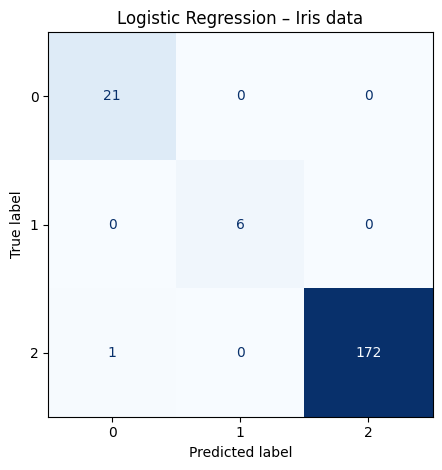

In [ ]:
cm = confusion_matrix(y_test, pred_xgb)
print("Confusion matrix:\n", cm)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_xgb.classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression – Iris data")
plt.tight_layout()
plt.show()

Confusion matrix:
 [[ 19   1   1]
 [  0   6   0]
 [  1   0 172]]


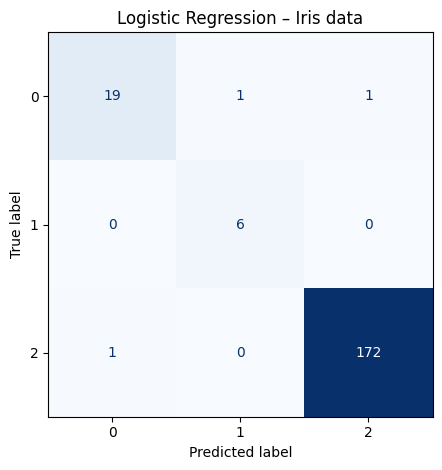

In [ ]:
cm = confusion_matrix(y_test, pred_lgb)
print("Confusion matrix:\n", cm)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lgb.classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression – Iris data")
plt.tight_layout()
plt.show()

Confusion matrix:
 [[ 19   0   2]
 [  0   6   0]
 [  1   0 172]]


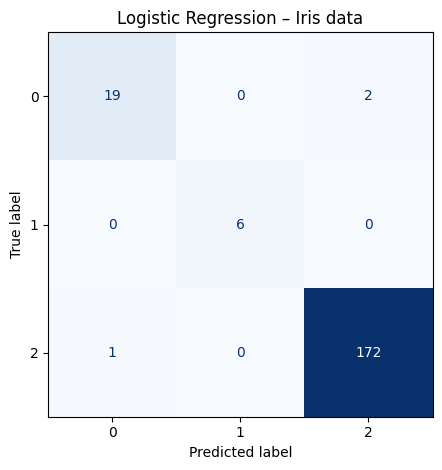

In [ ]:
cm = confusion_matrix(y_test, pred_cbc)
print("Confusion matrix:\n", cm)

# 5. Optional: pretty plot (sklearn ≥ 0.24)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_cbc.classes_)
disp.plot(cmap="Blues", colorbar=False)
plt.title("Logistic Regression – Iris data")
plt.tight_layout()
plt.show()

In [ ]:
fc_xgb = f1_score(y_test,pred_xgb,average="weighted")
fc_cbc = f1_score(y_test,pred_cbc,average="weighted")
fc_lgb = f1_score(y_test,pred_lgb,average="weighted")

print(f'''
xgb_model: {fc_xgb}

cbc_model: {fc_cbc}

lgb_model: {fc_lgb}
 ''')


xgb_model: 0.99

cbc_model: 0.99

lgb_model: 0.9901850613154961
 


In [ ]:
ohe_pipe2 = Pipeline([
    ('ohe2',OneHotEncoder(sparse_output=False))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', lgb.LGBMRegressor())
])

In [ ]:
ohe_pipe2 = Pipeline([
    ('ohe2',OneHotEncoder(sparse_output=False))
])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', xgb.XGBRegressor())
])

In [ ]:
# ohe_pipe2 = Pipeline([
#     ('ohe2',OneHotEncoder(sparse_output=False))
# ])
num_pipe = Pipeline([
    ('num_cols', PowerTransformer())
])
transform = ColumnTransformer([
    # ('ohe2', ohe_pipe2, ohe_cols2),
    ('num_cols', num_pipe, num_cols)
])
model_lgb = Pipeline([
    ('transform', transform),
    ('model', CatBoostRegressor())
])

In [ ]:
mae_xgb = abs(y_test-pred_xgb).mean()
mae_cbc = abs(y_test-pred_cbc).mean()
mae_lgb = abs(y_test-pred_lgb).mean()

print(f'''
xgb_model: {mae_xgb}

cbc_model: {mae_cbc}

lgb_model: {mae_lgb}
 ''')


xgb_model: 0.02

cbc_model: 0.4215

lgb_model: 0.015
 


In [ ]:
mse_xgb = ((y_test-pred_xgb)**2).mean()
mse_cbc = ((y_test-pred_cbc)**2).mean()
mse_lgb = ((y_test-pred_lgb)**2).mean()

print(f'''
xgb_model: {mse_xgb}

cbc_model: {mse_cbc}

lgb_model: {mse_lgb}
 ''')


xgb_model: 0.04

cbc_model: 0.7848

lgb_model: 0.025
 


In [ ]:
rmse_xgb = (((y_test-pred_xgb)**2).mean())**0.5
rmse_cbc = (((y_test-pred_cbc)**2).mean())**0.5
rmse_lgb = (((y_test-pred_lgb)**2).mean())**0.5

print(f'''
xgb_model: {rmse_xgb}

cbc_model: {rmse_cbc}

lgb_model: {rmse_lgb}
 ''')


xgb_model: 0.2

cbc_model: 0.885889383614004

lgb_model: 0.15811388300841897
 


In [ ]:
mape_xgb = (abs(y_test-pred_xgb)/(y_test+1)).mean()
mape_cbc = (abs(y_test-pred_cbc)/(y_test+1)).mean()
mape_lgb = (abs(y_test-pred_lgb)/(y_test+1)).mean()

print(f'''
xgb_model: {mape_xgb}

cbc_model: {mape_cbc}

lgb_model: {mape_lgb}
 ''')


xgb_model: 0.013333333333333332

cbc_model: 0.26854999999999996

lgb_model: 0.008333333333333333
 


In [ ]:
r2_xgb = r2_score(y_test, pred_xgb)
r2_cbc = r2_score(y_test, pred_cbc)
r2_lgb = r2_score(y_test, pred_lgb)

print(f'''
xgb_model: {r2_xgb}

cbc_model: {r2_cbc}

lgb_model: {r2_lgb}
 ''')


xgb_model: 0.8980632008154944

cbc_model: 0.8980632008154944

lgb_model: 0.936289500509684
 


In [ ]:
# profile = ProfileReport(df)
# profile.to_file(output_file='output.html')